# Simple Linear Regressionn - Capstone Project




Build a Model which predicts Customer Behavior - the volume of order customer

1.   List item
2.   List item

makes based website interaction


In [21]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import sklearn.metrics as metrics
sns.set_theme()
import statsmodels

In [2]:
df = pd.read_csv("/content/customer_behavior.csv")
df

,id,number_of_clicks,order_volume
0,1579,5,0
1,12750,5,0
2,15025,5,0
3,21602,0,0
4,28139,0,0
...,...,...,...
99995,5084,981,981
99996,9895,981,981
99997,17620,1512,1260
99998,39543,1584,1320


In [3]:
df.head()

,id,number_of_clicks,order_volume
0,1579,5,0
1,12750,5,0
2,15025,5,0
3,21602,0,0
4,28139,0,0


In [4]:
df.shape

(100000, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   id                100000 non-null  int64
 1   number_of_clicks  100000 non-null  int64
 2   order_volume      100000 non-null  int64
dtypes: int64(3)
memory usage: 2.3 MB


In [6]:
df.describe()

,id,number_of_clicks,order_volume
count,100000.000000,100000.00000,100000.000000
mean,50000.500000,49.33067,12.177690
std,28867.657797,108.11873,43.517317
min,1.000000,0.00000,0.000000
25%,25000.750000,5.00000,0.000000
50%,50000.500000,5.00000,0.000000
75%,75000.250000,45.00000,5.000000
max,100000.000000,2380.00000,1353.000000


In [7]:
print(df.isnull().sum())

id                  0
number_of_clicks    0
order_volume        0
dtype: int64


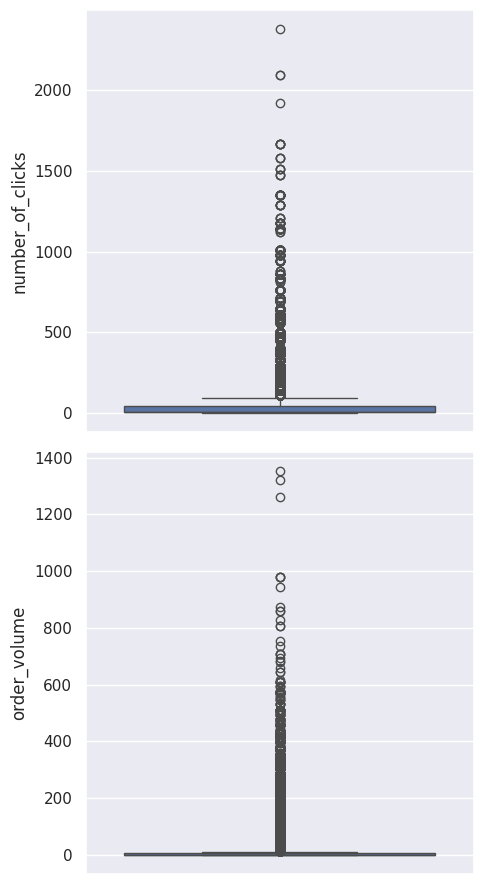

In [8]:
###outliers checking with boxplot
fig, axs = plt.subplots(2, figsize = (5,9))
plt1 = sns.boxplot(df['number_of_clicks'], ax = axs[0])
plt2 = sns.boxplot(df['order_volume'], ax = axs[1])
plt.tight_layout()

In [9]:
# Normalize features
scaler = MinMaxScaler()
df[['number_of_clicks', 'order_volume']] = scaler.fit_transform(df[['number_of_clicks','order_volume']])


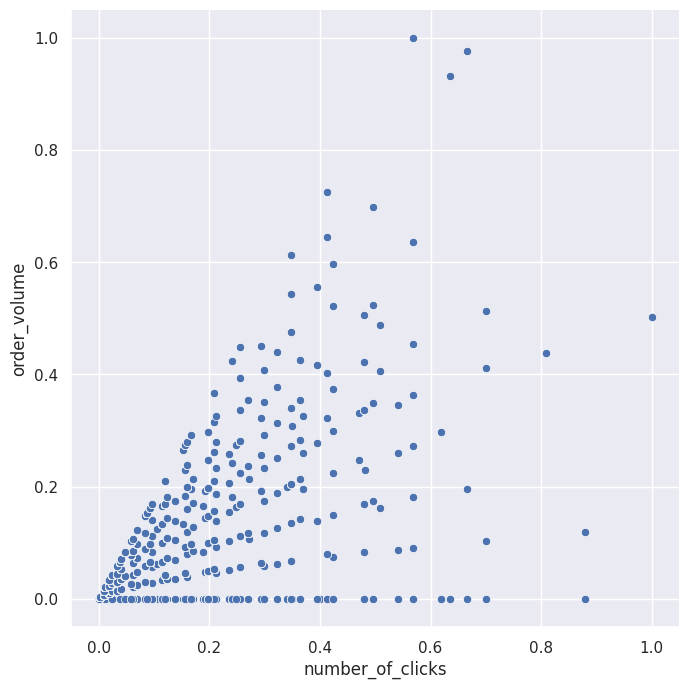

In [10]:
sns.pairplot(df, x_vars=['number_of_clicks'], y_vars='order_volume', height=7, aspect=1, kind='scatter')
plt.show()

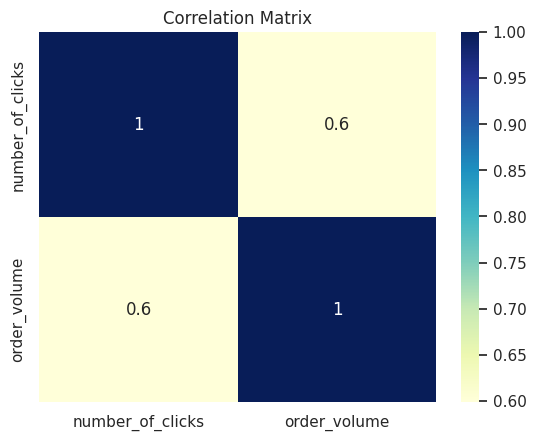

In [11]:
corr = df[['number_of_clicks', 'order_volume']].corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()

In [12]:
# model building

X = df[['number_of_clicks']]
y = df['order_volume']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= 0.7, random_state = 20)

In [13]:
model = LinearRegression(fit_intercept= True)
model.fit(X_train,y_train)

LinearRegression()

In [14]:
print(model.coef_)
print(model.intercept_)

[0.42153308]
0.0003125001946435793


In [19]:
y_pred = model.predict(X_test)
print(y_pred)

[0.00119807 0.00119807 0.00119807 ... 0.00119807 0.03715237 0.00119807]


In [16]:
# model evaluation
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
r_square = r2_score(y_test, y_pred)

print('Mean Absoulute Error = ', MAE)
print('Mean Squared Error = ', MSE)
print('Root Mean Squared Error =', RMSE)
print('r_square = ', r_square)

Mean Absoulute Error =  0.009899747441517682
Mean Squared Error =  0.0006531941505247031
Root Mean Squared Error = 0.025557663244606364
r_square =  0.36196760968455455


Meaning that 36.19% of the variance in order volume is explained by number of clicks


coeff of 0.42 is not statistically significant with a high p-value.
